In [1]:
import yfinance as yf
import pandas as pd
from datetime import date

# Define the stock and the time period
ticker_symbol = "RELIANCE.NS"
start_date = "2020-01-01"
end_date = date.today().strftime("%Y-%m-%d")
try:
    print(f"Downloading 5 years of stock data for {ticker_symbol}...")
    stock_df = yf.download(ticker_symbol, start=start_date, end=end_date)

    if not stock_df.empty:
        file_path = "reliance_stock_data_5_years.csv"
        stock_df.to_csv(file_path)
        print(f"✅ Success! Data downloaded and saved to '{file_path}'")
        print(f"Data shape: {stock_df.shape}")
        display(stock_df.tail())
    else:
        print("❌ Download failed. The returned data was empty.")

except Exception as e:
    print(f"An error occurred: {e}")

/tmp/ipykernel_2428/1613629470.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download(ticker_symbol, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed

✅ Success! Data downloaded and saved to 'reliance_stock_data_5_years.csv'
Data shape: (1466, 5)


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2025-11-24,1535.900024,1550.000000,1531.800049,1550.000000,18433951
2025-11-25,1539.699951,1559.599976,1525.099976,1535.900024,15033482
2025-11-26,1569.900024,1571.599976,1540.500000,1542.300049,14054299
2025-11-27,1563.400024,1575.500000,1556.000000,1575.000000,9794643
2025-11-28,1567.500000,1581.300049,1563.000000,1568.000000,8959508


In [2]:
!pip install gnews

In [3]:
import pandas as pd
from gnews import GNews
import time
from datetime import datetime

# This list will store all the articles we find
all_news = []
start_year = 2020
end_year = datetime.now().year

print(f"Starting deep news search from {start_year} to {end_year}. This will take a long time...")

# Loop through each year and each month
for year in range(start_year, end_year + 1):
    for month in range(1, 13):
        # Stop if we are in the future
        if year == end_year and month > datetime.now().month:
            break
            
        print(f"Fetching news for month: {year}-{month:02d}...")
        
        # Define the start and end date for the current month
        start_date = (year, month, 1)
        if month == 12:
            end_date = (year + 1, 1, 1)
        else:
            end_date = (year, month + 1, 1)
            
        # Initialize GNews for this specific time period
        google_news = GNews(language='en', country='IN', start_date=start_date, end_date=end_date)
        
        # Get the news and add it to our master list
        monthly_news = google_news.get_news('Reliance Industries')
        if monthly_news:
            all_news.extend(monthly_news)
        
        # Be polite to the server and wait 1 second between requests
        time.sleep(1)

# --- Process the final, large dataset ---
if all_news:
    news_df = pd.DataFrame(all_news)
    
    # Clean up and save the data
    news_df = news_df[['published date', 'title', 'publisher']]
    news_df.rename(columns={'published date': 'date', 'publisher': 'source'}, inplace=True)
    
    file_path = "reliance_news_data_FULL.csv"
    news_df.to_csv(file_path, index=False)
    
    print(f"\n✅ FULL news download complete! Data saved to '{file_path}'")
    print(f"Total articles found: {len(news_df)}")
    display(news_df.head())
else:
    print("❌ No articles were found with the deep search.")

Starting deep news search from 2020 to 2025. This will take a long time...
Fetching news for month: 2020-01...


Fetching news for month: 2020-02...


Fetching news for month: 2020-03...


Fetching news for month: 2020-04...


Fetching news for month: 2020-05...


Fetching news for month: 2020-06...


Fetching news for month: 2020-07...


Fetching news for month: 2020-08...


Fetching news for month: 2020-09...


Fetching news for month: 2020-10...


Fetching news for month: 2020-11...


Fetching news for month: 2020-12...


Fetching news for month: 2021-01...


Fetching news for month: 2021-02...


Fetching news for month: 2021-03...


Fetching news for month: 2021-04...


Fetching news for month: 2021-05...


Fetching news for month: 2021-06...


Fetching news for month: 2021-07...


Fetching news for month: 2021-08...


Fetching news for month: 2021-09...


Fetching news for month: 2021-10...


Fetching news for month: 2021-11...


Fetching news for month: 2021-12...


Fetching news for month: 2022-01...


Fetching news for month: 2022-02...


Fetching news for month: 2022-03...


Fetching news for month: 2022-04...


Fetching news for month: 2022-05...


Fetching news for month: 2022-06...


Fetching news for month: 2022-07...


Fetching news for month: 2022-08...


Fetching news for month: 2022-09...


Fetching news for month: 2022-10...


Fetching news for month: 2022-11...


Fetching news for month: 2022-12...


Fetching news for month: 2023-01...


Fetching news for month: 2023-02...


Fetching news for month: 2023-03...


Fetching news for month: 2023-04...


Fetching news for month: 2023-05...


Fetching news for month: 2023-06...


Fetching news for month: 2023-07...


Fetching news for month: 2023-08...


Fetching news for month: 2023-09...


Fetching news for month: 2023-10...


Fetching news for month: 2023-11...


Fetching news for month: 2023-12...


Fetching news for month: 2024-01...


Fetching news for month: 2024-02...


Fetching news for month: 2024-03...


Fetching news for month: 2024-04...


Fetching news for month: 2024-05...


Fetching news for month: 2024-06...


Fetching news for month: 2024-07...


Fetching news for month: 2024-08...


Fetching news for month: 2024-09...


Fetching news for month: 2024-10...


Fetching news for month: 2024-11...


Fetching news for month: 2024-12...


Fetching news for month: 2025-01...


Fetching news for month: 2025-02...


Fetching news for month: 2025-03...


Fetching news for month: 2025-04...


Fetching news for month: 2025-05...


Fetching news for month: 2025-06...


Fetching news for month: 2025-07...


Fetching news for month: 2025-08...


Fetching news for month: 2025-09...


Fetching news for month: 2025-10...


Fetching news for month: 2025-11...


Fetching news for month: 2025-12...



✅ FULL news download complete! Data saved to 'reliance_news_data_FULL.csv'
Total articles found: 6706


,date,title,source
0,"Tue, 21 Jan 2020 08:00:00 GMT",Mukesh Ambani's Reliance Industries is India's...,"{'href': 'https://www.livemint.com', 'title': ..."
1,"Thu, 02 Jan 2020 08:00:00 GMT",Reliance Industries is starting to roll out it...,"{'href': 'https://www.businessinsider.com', 't..."
2,"Mon, 06 Jan 2020 08:00:00 GMT",Is 2020 The Year That Reliance Becomes India's...,"{'href': 'https://variety.com', 'title': 'Vari..."
3,"Fri, 17 Jan 2020 08:00:00 GMT",Reliance Industries posts record Q3 profit at ...,"{'href': 'https://www.businesstoday.in', 'titl..."
4,"Tue, 07 Jan 2020 08:00:00 GMT",Reliance refers to start-up playbook to grow J...,"{'href': 'https://www.business-standard.com', ..."


In [4]:
import pandas as pd

file_path = "reliance_stock_data_5_years.csv"

print("Starting the one-time fix for the stock data CSV file...")

try:
    # Step 1: Load the messy CSV file using our robust command
    clean_df = pd.read_csv(
        file_path,
        index_col=0,
        parse_dates=True,
        skiprows=[1, 2]
    )
    clean_df.index.name = 'Date'
    print(" -> Successfully loaded the messy data into memory.")

    # Step 2: Save the clean DataFrame back to the SAME file path
    # This will OVERWRITE the old, messy file with a clean one.
    clean_df.to_csv(file_path)
    print(f" -> Successfully saved a clean version back to '{file_path}'.")

    print("\n✅✅✅ PERMANENT FIX COMPLETE ✅✅✅")
    print("The stock data CSV file is now permanently fixed. You will not see this error again.")

except Exception as e:
    print(f"An error occurred during the fix: {e}")

Starting the one-time fix for the stock data CSV file...
 -> Successfully loaded the messy data into memory.
 -> Successfully saved a clean version back to 'reliance_stock_data_5_years.csv'.

✅✅✅ PERMANENT FIX COMPLETE ✅✅✅
The stock data CSV file is now permanently fixed. You will not see this error again.


In [5]:
!conda install -c conda-forge nltk -y

CI detected...
By accessing https://repo.anaconda.com/pkgs/main via CI for this repository you 
acknowledge and agree to the Terms of Service:
ANACONDA TERMS OF SERVICE
Effective Date: July 15, 2025

See https://anaconda.com/legal/terms/terms-of-service
By accessing https://repo.anaconda.com/pkgs/r via CI for this repository you 
acknowledge and agree to the Terms of Service:
ANACONDA TERMS OF SERVICE
Effective Date: July 15, 2025

See https://anaconda.com/legal/terms/terms-of-service
2 channel Terms of Service accepted
Retrieving notices: - 

\ 

done


Channels:
 - conda-forge
 - defaults
Platform: linux-64

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

done
Solving environment: - 

\ 

done


==> WARNING: A newer version of conda exists. <==
    current version: 25.9.1
    latest version: 25.11.0

Please update conda by running

    $ conda update -n base -c defaults conda





## Package Plan ##

  environment location: /usr/share/miniconda

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.11.12 |       hbd8a1cb_0         149 KB  conda-forge
    certifi-2025.11.12         |     pyhd8ed1ab_0         153 KB  conda-forge
    conda-25.11.0              |  py313h78bf25f_0         1.2 MB  conda-forge
    joblib-1.5.2               |     pyhd8ed1ab_0         219 KB  conda-forge
    nltk-3.9.2                 |     pyhcf101f3_1         1.1 MB  conda-forge
    openssl-3.6.0              |       h26f9b46_0         3.0 MB  conda-forge
    regex-2025.11.3            |  py313h07c4f96_1         402 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.2 MB

The following NEW packages will be INSTALLED:

  joblib             conda-





joblib-1.5.2         | 219 KB    | ##6                                   |   7% 



joblib-1.5.2         | 219 KB    | ##################################### | 100% 
conda-25.11.0        | 1.2 MB    | 4                                     |   1% 


regex-2025.11.3      | 402 KB    | #4                                    |   4% 




regex-2025.11.3      | 402 KB    | ##################################### | 100% 

nltk-3.9.2           | 1.1 MB    | 5                                     |   1% 
openssl-3.6.0        | 3.0 MB    | 1                                     |   1% 




certifi-2025.11.12   | 153 KB    | ###8                                  |  10% 






certifi-2025.11.12   | 153 KB    | ##################################### | 100% 

nltk-3.9.2           | 1.1 MB    | ##################################### | 100% 





ca-certificates-2025 | 149 KB    | ###9                                  |  11% 


regex-2025.11.3      | 402 KB    | ##################################### | 100% 





ca-certificates-2025 | 149 KB    | ##################################### | 100% 






certifi-2025.11.12   | 153 KB    | ##################################### | 100% 



joblib-1.5.2         | 219 KB    | ##################################### | 100% 



openssl-3.6.0        | 3.0 MB    | ##################################### | 100% 





ca-certificates-2025 | 149 KB    | ##################################### | 100% 

openssl-3.6.0        | 3.0 MB    | ##################################### | 100% 

nltk-3.9.2           | 1.1 MB    | ##################################### | 100% 

nltk-3.9.2           | 1.1 MB    | ##################################### | 100% 
conda-25.11.0        | 1.2 MB    | ##################################### | 100% 

                                                                                

                                                                                


                                                                                



                                                                                




                                                                                






Preparing transaction: / 

done
Verifying transaction: \ 

| 

done
Executing transaction: - 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

done


In [6]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# --- NLTK Setup ---
# This directly downloads the required resources.
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
# --------------------

# Initialize the tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Cleans a text string by making it lowercase, removing punctuation,
    numbers, stopwords, and then lemmatizing the words.
    """
    if not isinstance(text, str):
        return ""
        
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    words = text.lower().split()
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return " ".join(cleaned_words)

print("✅ The clean_text function is now ready to use.")

✅ The clean_text function is now ready to use.


[nltk_data] Downloading package stopwords to /home/runner/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/runner/nltk_data...
[nltk_data] Downloading package omw-1.4 to /home/runner/nltk_data...


In [7]:
import pandas as pd

# Load the full news dataset from the CSV file
file_path = "reliance_news_data_FULL.csv"
news_df = pd.read_csv(file_path)

# Apply our cleaning function to the 'title' column
print("Cleaning all news headlines... this may take a minute.")
news_df['cleaned_title'] = news_df['title'].apply(clean_text)
print("✅ Text cleaning complete.")

# Display the original and cleaned titles to see the result
display(news_df[['title', 'cleaned_title']].head())

Cleaning all news headlines... this may take a minute.


✅ Text cleaning complete.


,title,cleaned_title
0,Mukesh Ambani's Reliance Industries is India's...,mukesh ambanis reliance industry india answer ...
1,Reliance Industries is starting to roll out it...,reliance industry starting roll new ecommerce ...
2,Is 2020 The Year That Reliance Becomes India's...,year reliance becomes india digital champion v...
3,Reliance Industries posts record Q3 profit at ...,reliance industry post record q profit r crore...
4,Reliance refers to start-up playbook to grow J...,reliance refers startup playbook grow jio inte...


In [8]:
import os
import shutil
from pathlib import Path

# Define the cache directory
cache_dir = Path.home() / ".cache" / "huggingface"

try:
    if os.path.exists(cache_dir):
        print(f"Found cache directory at: {cache_dir}")
        shutil.rmtree(cache_dir)
        print("✅ Hugging Face cache has been cleared successfully.")
    else:
        print("Cache directory not found, no action needed.")

except Exception as e:
    print(f"An error occurred while clearing the cache: {e}")

Cache directory not found, no action needed.


In [9]:
import pandas as pd
import torch
# --- CHANGE 1: Import the specific BERT model class ---
from transformers import AutoTokenizer, BertForSequenceClassification

# --- 1. Load the FinBERT Model and Tokenizer ---
print("Loading FinBERT model and tokenizer...")
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
# --- CHANGE 2: Use the specific class to load the model ---
model = BertForSequenceClassification.from_pretrained("ProsusAI/finbert")
print("✅ Model and tokenizer loaded.")

# --- 2. Load Your Cleaned News Data ---
file_path = "reliance_news_data_FULL.csv"
news_df = pd.read_csv(file_path)
news_df.dropna(subset=['title'], inplace=True)
news_df['cleaned_title'] = news_df['title'].apply(clean_text)

# --- 3. Define a Function for Batch Sentiment Analysis ---
def get_finbert_sentiments(text_list):
    inputs = tokenizer(text_list, padding=True, truncation=True, return_tensors="pt", max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_labels = [model.config.id2label[label_id] for label_id in torch.argmax(predictions, dim=1).tolist()]
    return sentiment_labels

# --- 4. Process the Headlines in Batches ---
print("\nStarting sentiment analysis with FinBERT. This will take a very long time...")
batch_size = 64
all_sentiments = []
titles_to_process = news_df['cleaned_title'].tolist()

for i in range(0, len(titles_to_process), batch_size):
    batch = titles_to_process[i:i + batch_size]
    sentiments = get_finbert_sentiments(batch)
    all_sentiments.extend(sentiments)
    print(f"  Processed {min(i + batch_size, len(titles_to_process))}/{len(titles_to_process)} headlines...")

# --- 5. Add Sentiments to DataFrame ---
news_df['finbert_sentiment'] = all_sentiments
print("\n✅ FinBERT sentiment analysis complete.")
display(news_df[['cleaned_title', 'finbert_sentiment']].head())

# Save the results to a new CSV
news_df.to_csv("reliance_news_with_finbert_sentiment.csv", index=False)
print("✅ Results have been saved to 'reliance_news_with_finbert_sentiment.csv'")

2025-12-01 14:40:58.537967: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-01 14:40:58.589904: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2025-12-01 14:40:59.827780: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


12/01/2025 02:41:00 PM - Failed to extract font properties from /usr/share/fonts/truetype/noto/NotoColorEmoji.ttf: In FT2Font: Can not load face (unknown file format; error code 0x2)


12/01/2025 02:41:00 PM - generated new fontManager


Loading FinBERT model and tokenizer...


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

✅ Model and tokenizer loaded.


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]


Starting sentiment analysis with FinBERT. This will take a very long time...


  Processed 64/6706 headlines...


  Processed 128/6706 headlines...


  Processed 192/6706 headlines...


  Processed 256/6706 headlines...


  Processed 320/6706 headlines...


  Processed 384/6706 headlines...


  Processed 448/6706 headlines...


  Processed 512/6706 headlines...


  Processed 576/6706 headlines...


  Processed 640/6706 headlines...


  Processed 704/6706 headlines...


  Processed 768/6706 headlines...


  Processed 832/6706 headlines...


  Processed 896/6706 headlines...


  Processed 960/6706 headlines...


  Processed 1024/6706 headlines...


  Processed 1088/6706 headlines...


  Processed 1152/6706 headlines...


  Processed 1216/6706 headlines...


  Processed 1280/6706 headlines...


  Processed 1344/6706 headlines...


  Processed 1408/6706 headlines...


  Processed 1472/6706 headlines...


  Processed 1536/6706 headlines...


  Processed 1600/6706 headlines...


  Processed 1664/6706 headlines...


  Processed 1728/6706 headlines...


  Processed 1792/6706 headlines...


  Processed 1856/6706 headlines...


  Processed 1920/6706 headlines...


  Processed 1984/6706 headlines...


  Processed 2048/6706 headlines...


  Processed 2112/6706 headlines...


  Processed 2176/6706 headlines...


  Processed 2240/6706 headlines...


  Processed 2304/6706 headlines...


  Processed 2368/6706 headlines...


  Processed 2432/6706 headlines...


  Processed 2496/6706 headlines...


  Processed 2560/6706 headlines...


  Processed 2624/6706 headlines...


  Processed 2688/6706 headlines...


  Processed 2752/6706 headlines...


  Processed 2816/6706 headlines...


  Processed 2880/6706 headlines...


  Processed 2944/6706 headlines...


  Processed 3008/6706 headlines...


  Processed 3072/6706 headlines...


  Processed 3136/6706 headlines...


  Processed 3200/6706 headlines...


  Processed 3264/6706 headlines...


  Processed 3328/6706 headlines...


  Processed 3392/6706 headlines...


  Processed 3456/6706 headlines...


  Processed 3520/6706 headlines...


  Processed 3584/6706 headlines...


  Processed 3648/6706 headlines...


  Processed 3712/6706 headlines...


  Processed 3776/6706 headlines...


  Processed 3840/6706 headlines...


  Processed 3904/6706 headlines...


  Processed 3968/6706 headlines...


  Processed 4032/6706 headlines...


  Processed 4096/6706 headlines...


  Processed 4160/6706 headlines...


  Processed 4224/6706 headlines...


  Processed 4288/6706 headlines...


  Processed 4352/6706 headlines...


  Processed 4416/6706 headlines...


  Processed 4480/6706 headlines...


  Processed 4544/6706 headlines...


  Processed 4608/6706 headlines...


  Processed 4672/6706 headlines...


  Processed 4736/6706 headlines...


  Processed 4800/6706 headlines...


  Processed 4864/6706 headlines...


  Processed 4928/6706 headlines...


  Processed 4992/6706 headlines...


  Processed 5056/6706 headlines...


  Processed 5120/6706 headlines...


  Processed 5184/6706 headlines...


  Processed 5248/6706 headlines...


  Processed 5312/6706 headlines...


  Processed 5376/6706 headlines...


  Processed 5440/6706 headlines...


  Processed 5504/6706 headlines...


  Processed 5568/6706 headlines...


  Processed 5632/6706 headlines...


  Processed 5696/6706 headlines...


  Processed 5760/6706 headlines...


  Processed 5824/6706 headlines...


  Processed 5888/6706 headlines...


  Processed 5952/6706 headlines...


  Processed 6016/6706 headlines...


  Processed 6080/6706 headlines...


  Processed 6144/6706 headlines...


  Processed 6208/6706 headlines...


  Processed 6272/6706 headlines...


  Processed 6336/6706 headlines...


  Processed 6400/6706 headlines...


  Processed 6464/6706 headlines...


  Processed 6528/6706 headlines...


  Processed 6592/6706 headlines...


  Processed 6656/6706 headlines...


  Processed 6706/6706 headlines...

✅ FinBERT sentiment analysis complete.


,cleaned_title,finbert_sentiment
0,mukesh ambanis reliance industry india answer ...,neutral
1,reliance industry starting roll new ecommerce ...,neutral
2,year reliance becomes india digital champion v...,neutral
3,reliance industry post record q profit r crore...,positive
4,reliance refers startup playbook grow jio inte...,neutral


✅ Results have been saved to 'reliance_news_with_finbert_sentiment.csv'


In [10]:
import pandas as pd
import numpy as np

# --- 1. Load Your Two Processed Datasets ---
print("Loading processed stock and news data...")
stock_df = pd.read_csv("reliance_stock_data_5_years.csv", index_col=0, parse_dates=True)
news_df = pd.read_csv("reliance_news_with_finbert_sentiment.csv")
print(" -> Data loaded.")

# --- 2. Process the Stock Data (Manual Indicators) ---
print("Calculating technical indicators (SMA and RSI)...")

# Calculate 14-day Simple Moving Average (SMA)
stock_df['SMA_14'] = stock_df['Close'].rolling(window=14).mean()

# Function to calculate RSI
def calculate_rsi(data, window=14):
    close_prices = data['Close']
    delta = close_prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate 14-day RSI
stock_df['RSI_14'] = calculate_rsi(stock_df)
stock_df.dropna(inplace=True) # Drop rows with NaN values from indicator calculation
print(" -> Indicators calculated.")


# --- 3. Process the News Data ---
print("Processing news sentiment scores...")
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
news_df['sentiment_score'] = news_df['finbert_sentiment'].map(sentiment_map)
news_df['date'] = pd.to_datetime(news_df['date'])
news_df['just_date'] = news_df['date'].dt.date
daily_sentiment = news_df.groupby('just_date')['sentiment_score'].mean().reset_index()
daily_sentiment['just_date'] = pd.to_datetime(daily_sentiment['just_date'])
print(" -> Sentiment processed.")


# --- 4. Merge the Datasets ---
print("Merging stock and sentiment data...")
final_df = stock_df.merge(daily_sentiment, left_index=True, right_on='just_date', how='left')
final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment
final_df.dropna(inplace=True) # Drop any remaining NaN rows (usually from the start)
final_df.set_index('just_date', inplace=True)
final_df.index.name = 'Date'
print(" -> Data merged.")


# --- 5. Save the Final, Clean Master Dataset ---
final_df.to_csv("final_master_dataset.csv")
print("\n✅✅✅ Final master dataset created and saved to 'final_master_dataset.csv'!")
display(final_df.head())

Loading processed stock and news data...
 -> Data loaded.
Calculating technical indicators (SMA and RSI)...
 -> Indicators calculated.
Processing news sentiment scores...
 -> Sentiment processed.
Merging stock and sentiment data...
 -> Data merged.

✅✅✅ Final master dataset created and saved to 'final_master_dataset.csv'!


/tmp/ipykernel_2428/1417212574.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment
/tmp/ipykernel_2428/1417212574.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment


,Close,High,Low,Open,Volume,SMA_14,RSI_14,sentiment_score
Date,,,,,,,,
2020-01-20,685.501526,719.791148,682.839761,719.791148,32545850,685.892970,54.332546,0.166667
2020-01-21,686.194885,691.540751,680.871356,683.823922,18922720,686.669451,54.600553,0.000000
2020-01-22,685.948853,691.943392,684.942307,690.713176,10322817,686.607138,49.591947,0.000000
2020-01-23,683.041077,689.796095,680.289844,687.358000,11247739,686.278015,47.885880,0.000000
2020-01-24,680.670166,687.290983,679.328085,683.108201,14628445,686.918688,54.701059,0.000000


In [11]:
import pandas as pd
df = pd.read_csv("final_master_dataset.csv")
print("--- Verifying the final_master_dataset.csv file ---")
display(df.tail())

--- Verifying the final_master_dataset.csv file ---


,Date,Close,High,Low,Open,Volume,SMA_14,RSI_14,sentiment_score
1448,2025-11-24,1535.900024,1550.000000,1531.800049,1550.000000,18433951,1511.385725,74.378938,0.000000
1449,2025-11-25,1539.699951,1559.599976,1525.099976,1535.900024,15033482,1516.142866,75.113164,0.687500
1450,2025-11-26,1569.900024,1571.599976,1540.500000,1542.300049,14054299,1521.414298,76.394904,0.333333
1451,2025-11-27,1563.400024,1575.500000,1556.000000,1575.000000,9794643,1527.514300,83.307386,0.285714
1452,2025-11-28,1567.500000,1581.300049,1563.000000,1568.000000,8959508,1533.100010,82.314095,0.166667


In [12]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Create a new DataFrame with only the features we'll use for modeling
# We are dropping columns like Open, High, Low as they are highly correlated with Close
model_df = final_df[['Close', 'Volume', 'SMA_14', 'RSI_14', 'sentiment_score']]

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(model_df)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=model_df.columns, index=model_df.index)

print("✅ Data has been successfully scaled.")
display(scaled_df.head())

✅ Data has been successfully scaled.


,Close,Volume,SMA_14,RSI_14,sentiment_score
Date,,,,,
2020-01-20,0.242967,0.228098,0.206927,0.518806,0.583333
2020-01-21,0.243548,0.132620,0.207626,0.521789,0.500000
2020-01-22,0.243342,0.072348,0.207570,0.466039,0.500000
2020-01-23,0.240906,0.078830,0.207273,0.447049,0.500000
2020-01-24,0.238920,0.102524,0.207850,0.522908,0.500000


In [13]:
import numpy as np

# --- Create sequences ---
# We'll look at 60 days of history to predict the 61st day
time_step = 60
X_data, y_data = [], []

# Loop through the scaled data to create the sequences
for i in range(time_step, len(scaled_df)):
    # X_data will contain a window of the previous 60 days
    X_data.append(scaled_df.iloc[i-time_step:i].values)
    # y_data will contain the closing price of the 61st day
    # .iloc[i, 0] gets the 'Close' price, which is the first column
    y_data.append(scaled_df.iloc[i, 0])

# Convert the lists to numpy arrays
X_data, y_data = np.array(X_data), np.array(y_data)

print("✅ Data has been successfully converted into sequences.")
print(f"Shape of X_data: {X_data.shape}")
print(f"Shape of y_data: {y_data.shape}")

✅ Data has been successfully converted into sequences.
Shape of X_data: (1393, 60, 5)
Shape of y_data: (1393,)


In [14]:
# Define the split point (80% of the data for training)
train_size = int(len(X_data) * 0.8)

# Split the data chronologically
X_train, X_test = X_data[:train_size], X_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

print("✅ Data has been successfully split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

✅ Data has been successfully split into training and testing sets.
X_train shape: (1114, 60, 5)
y_train shape: (1114,)
X_test shape: (279, 60, 5)
y_test shape: (279,)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the model architecture (without the outdated 'time_major' argument)
model = Sequential()

# Add the first LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Add a second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

2025-12-01 14:43:16.540019: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/opt/hostedtoolcache/Python/3.9.25/x64/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

Making predictions on the test data...


1/9 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step

8/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


✅ Predictions have been converted back to actual Rupee values.

Model Performance on Test Data:
Mean Absolute Error (MAE): 764.22 INR
R-squared (R²) Score: -57.50


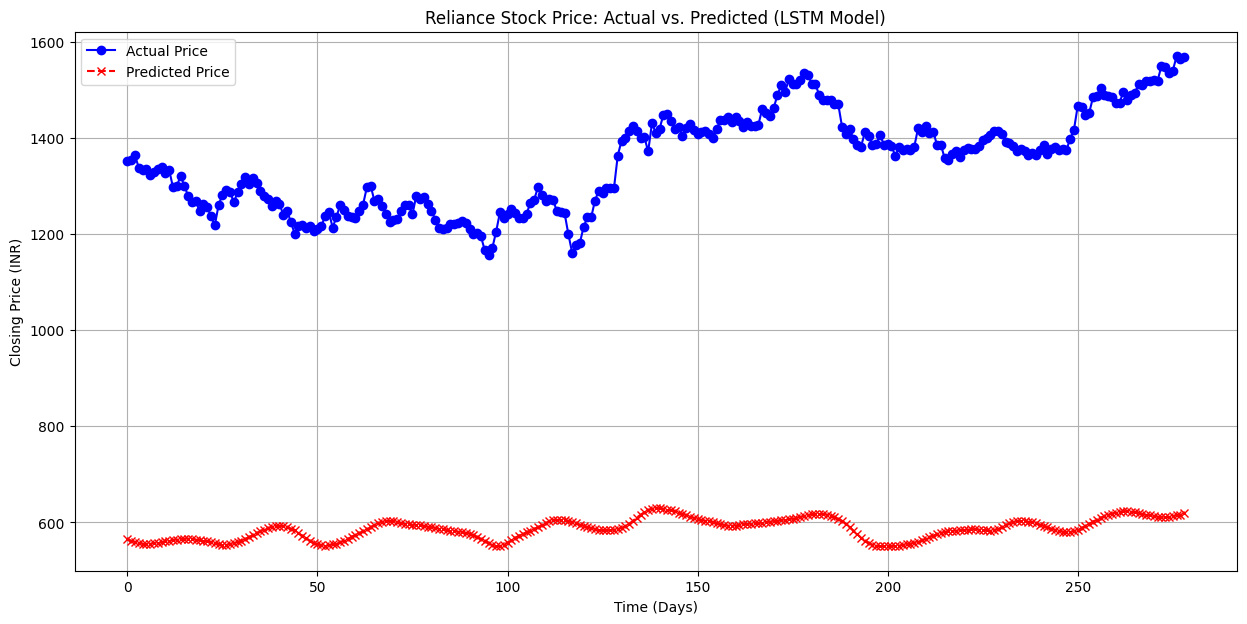

In [16]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# --- 1. Make Predictions on the Test Data ---
print("Making predictions on the test data...")
predictions_scaled = model.predict(X_test)

# --- 2. Inverse Scale the Predictions and Actuals ---
# We need to reshape the data to have 5 columns to match the scaler's input shape
# Create a dummy array with the same shape as the original data
dummy_array_pred = np.zeros((len(predictions_scaled), 5))
# Place our predictions into the first column (the 'Close' price column)
dummy_array_pred[:, 0] = predictions_scaled.ravel()
# Inverse transform the dummy array
predictions_actual = scaler.inverse_transform(dummy_array_pred)[:, 0]

# Do the same for the y_test actual values
dummy_array_actual = np.zeros((len(y_test), 5))
dummy_array_actual[:, 0] = y_test.ravel()
y_test_actual = scaler.inverse_transform(dummy_array_actual)[:, 0]
print("✅ Predictions have been converted back to actual Rupee values.")


# --- 3. Evaluate the Model's Performance ---
mae = mean_absolute_error(y_test_actual, predictions_actual)
r2 = r2_score(y_test_actual, predictions_actual)
print(f"\nModel Performance on Test Data:")
print(f"Mean Absolute Error (MAE): {mae:.2f} INR")
print(f"R-squared (R²) Score: {r2:.2f}")


# --- 4. Visualize the Results ---
plt.figure(figsize=(15, 7))
plt.plot(y_test_actual, label='Actual Price', color='blue', marker='o', linestyle='-')
plt.plot(predictions_actual, label='Predicted Price', color='red', marker='x', linestyle='--')
plt.title('Reliance Stock Price: Actual vs. Predicted (LSTM Model)')
plt.xlabel('Time (Days)')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.grid(True)
plt.savefig('lstm_prediction_vs_actual.png')
plt.show()

In [17]:
print("Starting model training... this will take several minutes.")

# Train the model
# epochs=50 means the model will see the entire dataset 50 times
# batch_size=32 means the model will look at 32 samples at a time
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

print("\n✅✅✅ Model training complete!")

Starting model training... this will take several minutes.
Epoch 1/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - loss: 0.2659

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2146

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1762

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1537

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1389

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1273

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1177

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1099

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1036

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0982

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0935

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0893

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0855

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0822

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0792

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0764

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0739

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0716

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0706 - val_loss: 0.0137


Epoch 2/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0102

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0099

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0094

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0091

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0089

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0087

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0085

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0084

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0083

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0082

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0082

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0081

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0081

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0081

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0081

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0080

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0080

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0080

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0080 - val_loss: 0.0014


Epoch 3/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0079

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0070

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0067

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0066

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0066

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0064

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0063

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0062

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0062

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0061

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0061

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0061

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0061

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0060

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0060

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0060

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0059

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0059

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0059 - val_loss: 0.0017


Epoch 4/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0050

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0052

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0049

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0048

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0047

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0047

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0046

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0046

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0045

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0045

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0045

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0045

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0045

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0045

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0045

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0045

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0045

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0045

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0045 - val_loss: 0.0015


Epoch 5/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0039

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0044

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0044

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0044

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0045

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0045

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0045

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0045

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0045

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0045

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0045

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0045

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0045

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0045

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0045

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0045

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0044

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0044

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0044 - val_loss: 0.0017


Epoch 6/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0043

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0038

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0038

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0039

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0039

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0039

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0039

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0040

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0040

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0040

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0040

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0040

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0041

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0041

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0041

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0041

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0041

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0041

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0041 - val_loss: 9.8437e-04


Epoch 7/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0045

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0044

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0046

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0047

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0047

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0047

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0047

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0047

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0047

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0047

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0047

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0047

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0047

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0047

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0047

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0047

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0046

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0046

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0046 - val_loss: 0.0011


Epoch 8/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0024

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0034

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0036

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0038

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0039

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0039

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0039

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0039

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0039

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0039

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0039

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0039

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0038

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0038

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0038

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0038

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0038

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0038

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0038 - val_loss: 0.0012


Epoch 9/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0029

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0033

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0036

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0038

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0039

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0040

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0040

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0040

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0041

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0041

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0041

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0041

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0042

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0042

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0042

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0042

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0042

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0042

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0042 - val_loss: 0.0016


Epoch 10/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0033

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0033 - val_loss: 9.5963e-04


Epoch 11/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0054

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0048

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0047

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0046

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0045

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0044

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0044

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0043

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0043

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0043

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0043

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0043

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0042

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0042

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0042

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0042

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0041

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0041

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0041 - val_loss: 0.0016


Epoch 12/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0032

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0030

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0032

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0032 - val_loss: 0.0020


Epoch 13/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0048

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0042

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0041

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0041

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0041

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0041

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0041

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0041

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0041

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0041

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0040

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0040

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0040

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0040

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0040

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0040

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0039

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0039

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0039 - val_loss: 8.7069e-04


Epoch 14/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0036

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0038

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0037

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0035

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0035

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0034

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0034

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0034

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0034

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0034

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0034

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0034

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0034

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0034

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0034

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0034

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0034

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0034

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0034 - val_loss: 0.0012


Epoch 15/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0028

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0030

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0031

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0031

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0032

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0032

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0032

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0032

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0033

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0033

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0033

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0033

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0034

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0034

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0034

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0034

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0034

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0034

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0034 - val_loss: 0.0020


Epoch 16/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0049

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0049

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0045

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0043

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0041

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0040

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0039

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0038

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0038

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0037

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0037

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0036

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0036

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0035

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0035

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0035 - val_loss: 0.0022


Epoch 17/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0041

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0032

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0030

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0030

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0029 - val_loss: 0.0026


Epoch 18/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0041

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0042

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0039

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0039

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0039

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0039

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0038

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0038

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0037

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0037

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0037

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0037

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0036

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0036

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0036

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0035

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0035

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0035

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0035 - val_loss: 9.5397e-04


Epoch 19/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0024

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0030

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0031

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0031

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0031

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0032

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0031 - val_loss: 0.0011


Epoch 20/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0036

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0033

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0032

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0032

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0031 - val_loss: 9.8053e-04


Epoch 21/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0023

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0028

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0028 - val_loss: 0.0011


Epoch 22/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0021

 3/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0022

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0024

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0026

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0027

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0028

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0028

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0028

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0029

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0029

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0029

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0029

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0029

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0029

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0029

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0029

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0029 - val_loss: 0.0016


Epoch 23/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0025

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0028

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0027

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0028

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0028

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0028

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0028

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0028

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0028

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0029

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0029

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0029

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0029

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0029

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0029 - val_loss: 7.9517e-04


Epoch 24/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0030

 3/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0033

 5/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0032

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0033

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0033

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0033

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0032

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0032

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0032

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0032

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0032

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0032

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0031

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0031

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0031

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0031

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0031

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0031

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0031 - val_loss: 0.0010


Epoch 25/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0017

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0027

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0027

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0028

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0028

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0029

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0030 - val_loss: 7.8896e-04


Epoch 26/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0036

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0030

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0030

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0029 - val_loss: 8.0949e-04


Epoch 27/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0019

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0024

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0025 - val_loss: 0.0014


Epoch 28/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0020

 3/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0024

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0024

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0026

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0026 - val_loss: 6.9027e-04


Epoch 29/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0021

 3/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0021

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0023

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0024

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0024

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0026 - val_loss: 7.1912e-04


Epoch 30/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0020

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0024

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0024

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0026

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0026

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0026

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0026

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0026

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0026

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0027

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0027

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0027

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0027

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0027 - val_loss: 7.2185e-04


Epoch 31/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0018

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0026 - val_loss: 9.3081e-04


Epoch 32/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0024

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0023

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0024 - val_loss: 6.9432e-04


Epoch 33/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0042

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0029

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0029

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0029

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0028

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0028

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0028

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0028

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0028

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0027

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0027

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0027

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0027

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0027

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0027

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0027

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0027

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0026 - val_loss: 6.2841e-04


Epoch 34/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0010

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0013

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0016

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0024 - val_loss: 7.3958e-04


Epoch 35/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0022

 3/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0024

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0024

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0024

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0025 - val_loss: 0.0013


Epoch 36/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0021

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0020

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0024 - val_loss: 9.9356e-04


Epoch 37/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0021

 3/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0025

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0026

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0027

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0026

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0026

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0026

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0026

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0026

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0026

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0026

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0026

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0026 - val_loss: 9.1733e-04


Epoch 38/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0020

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0022 - val_loss: 6.5447e-04


Epoch 39/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0020

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0021

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0021

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0021

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0021

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0021

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0021

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0021

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0021

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0020

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0020

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0020

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0020

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0020

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0020

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0020

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0020 - val_loss: 6.4494e-04


Epoch 40/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 9.2868e-04

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0013    

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0015

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0016

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0017

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0017

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0018

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0018

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0020

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0020

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0020

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0020

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0020

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0020

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0020 - val_loss: 6.4747e-04


Epoch 41/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0031

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0022 - val_loss: 6.1098e-04


Epoch 42/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0016

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0016

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0016

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0017

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0017

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0017

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0017

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0018

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0018

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0018

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0018

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0018

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0018

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0019 - val_loss: 5.7487e-04


Epoch 43/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0025

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0024

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0024

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0023

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0023

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0023

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0022

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0022

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0022

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0022

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0022

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0022

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0022

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0022

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0022

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0022

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0021

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0021 - val_loss: 0.0011


Epoch 44/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0020

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0015

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0015

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0015

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0015

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0016

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0016

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0016

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0016

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0017

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0017

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0017

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0017

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0017

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0018

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0018

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0018

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0018

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0018 - val_loss: 6.8826e-04


Epoch 45/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0022

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0023

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0023

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0022 - val_loss: 0.0010


Epoch 46/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0020

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0017

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0018

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0018

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0018

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0018

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0019 - val_loss: 6.1104e-04


Epoch 47/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0013

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0015

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0015

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0016

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0017

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0017

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0018

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0020 - val_loss: 8.0660e-04


Epoch 48/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0021

 3/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0020

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0020 - val_loss: 5.3331e-04


Epoch 49/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0018

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0020

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0021 - val_loss: 8.3808e-04


Epoch 50/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0019

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0023

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0021 - val_loss: 5.2821e-04



✅✅✅ Model training complete!


In [18]:
import joblib

# Save the trained LSTM model
model.save('lstm_model.h5')
print("✅ Model has been saved in .h5 format.")

# Save the scaler object
joblib.dump(scaler, 'scaler.pkl')
print("✅ Scaler has been saved to scaler.pkl.")

12/01/2025 02:44:18 PM - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


✅ Model has been saved in .h5 format.
✅ Scaler has been saved to scaler.pkl.
